In [48]:
import pandas as pd
import ast
import datetime
from google.colab import drive
import matplotlib.pyplot as plt
import randan
from randan.tools import coLabAdaptor, textPreprocessor, vectorizer
from tqdm.notebook import tqdm
from tqdm import tqdm
from transformers import pipeline
import pymystem3
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/matroskin/matroskin_wall_posts_new.csv') #–∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Å–æ –≤—Å–µ–º–∏ –ø–æ—Å—Ç–∞–º–∏ –ø—Ä–∏—é—Ç–∞ –ú–∞—Ç—Ä–æ—Å–∫–∏–Ω
df

/tmp/ipython-input-4112925609.py:1: DtypeWarning: Columns (27,28,29,32,35,40,41,42,43,44,47,48,49,51,52,53,55,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/matroskin/matroskin_wall_posts_new.csv') #–∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Å–æ –≤—Å–µ–º–∏ –ø–æ—Å—Ç–∞–º–∏ –ø—Ä–∏—é—Ç–∞ –ú–∞—Ç—Ä–æ—Å–∫–∏–Ω


Unnamed: 0     inner_type  is_pinned  marked_as_ads  \
0               0  wall_wallpost        1.0              0   
1               1  wall_wallpost        NaN              0   
2               2  wall_wallpost        NaN              0   
3               3  wall_wallpost        NaN              0   
4               4  wall_wallpost        NaN              0   
...           ...            ...        ...            ...   
33647       33647  wall_wallpost        NaN              0   
33648       33648  wall_wallpost        NaN              0   
33649       33649  wall_wallpost        NaN              0   
33650       33650  wall_wallpost        NaN              0   
33651       33651  wall_wallpost        NaN              0   

                     hash  type  carousel_offset  \
0      8RnWqRsW-MplV4_-4w  post              0.0   
1      Rk2V8bS4QFmJ-xAPUg  post              0.0   
2      RbxqxxB3Vrb7RbsvFw  post              0.0   
3      WkbdtFPac0oIzta9cQ  post              0.0   
4      VYLt4iD435BxiOl4Dw  post              0.0   
...                   ...   ...              ...   
33647  Ef5vtKVKCf3ol-f8Rg  post              NaN   
33648  A8NRIHWmN53a-l-ycg  post              NaN   
33649  4zhZwvIfiPiGrFDWeg  post              NaN   
33650  44iKVss8RK_bRuTGjg  post              NaN   
33651  KWb_A2WzT6qcosAlhw  post              NaN   

                                             attachments        date  \
0      [{'type': 'video', 'video': {'response_type': ...  1756473114   
1      [{'type': 'photo', 'photo': {'album_id': -7, '...  1756893666   
2      [{'type': 'photo', 'photo': {'album_id': -7, '...  1756886400   
3      [{'type': 'photo', 'photo': {'album_id': -7, '...  1756879200   
4      [{'type': 'photo', 'photo': {'album_id': -7, '...  1756814400   
...                                                  ...         ...   
33647                                                 []  1299671436   
33648                                                 []  1298824260   
33649                                                 []  1298824149   
33650                                                 []  1298824114   
33651  [{'type': 'video', 'video': {'response_type': ...  1295614035   

             edited  ...  geo.place.address  copy_history copyright.link  \
0      1.756473e+09  ...                NaN           NaN            NaN   
1               NaN  ...                NaN           NaN            NaN   
2               NaN  ...                NaN           NaN            NaN   
3               NaN  ...                NaN           NaN            NaN   
4               NaN  ...                NaN           NaN            NaN   
...             ...  ...                ...           ...            ...   
33647           NaN  ...                NaN           NaN            NaN   
33648           NaN  ...                NaN           NaN            NaN   
33649           NaN  ...                NaN           NaN            NaN   
33650           NaN  ...                NaN           NaN            NaN   
33651           NaN  ...                NaN           NaN            NaN   

       copyright.name copyright.type copyright.id  geo.place.city  \
0                 NaN            NaN          NaN             NaN   
1                 NaN            NaN          NaN             NaN   
2                 NaN            NaN          NaN             NaN   
3                 NaN            NaN          NaN             NaN   
4                 NaN            NaN          NaN             NaN   
...               ...            ...          ...             ...   
33647             NaN            NaN          NaN             NaN   
33648             NaN            NaN          NaN             NaN   
33649             NaN            NaN          NaN             NaN   
33650             NaN            NaN          NaN             NaN   
33651             NaN            NaN          NaN             NaN   

       marked_as_author_ad geo

In [ ]:
def parse_attachments(cell):
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç —Å—Ç—Ä–æ–∫—É —Å –≤–ª–æ–∂–µ–Ω–∏—è–º–∏ –≤ Python-–æ–±—ä–µ–∫—Ç
    # –ï—Å–ª–∏ –Ω–µ—É–¥–∞—á–Ω–æ ‚Äî –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –ø—É—Å—Ç–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    # –ò–∑–≤–ª–µ–∫–∞–µ—Ç —Ç–∏–ø –≤–ª–æ–∂–µ–Ω–∏—è –∏ –¥–∞–Ω–Ω—ã–µ –≤–∏–¥–µ–æ (–µ—Å–ª–∏ –µ—Å—Ç—å)
    try:
        attachments = ast.literal_eval(cell)
    except Exception:
        return pd.Series()

    data = {}
    if isinstance(attachments, list) and attachments:
        for att in attachments:
            if 'type' in att:
                data['type'] = att['type']
            if att.get('type') == 'video' and 'video' in att:
                # –î–æ–±–∞–≤–ª—è–µ–º –¥–µ—Ç–∞–ª–∏ –≤–∏–¥–µ–æ —Å –ø—Ä–µ—Ñ–∏–∫—Å–æ–º video_
                for key, value in att['video'].items():
                    data[f'video_{key}'] = value
    return pd.Series(data)

# –†–∞–∑–±–∏—Ä–∞–µ–º –∫–æ–ª–æ–Ω–∫—É 'attachments' –∏ –¥–æ–±–∞–≤–ª—è–µ–º –∏–∑–≤–ª–µ—á—ë–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ DataFrame
df_parsed = df['attachments'].apply(parse_attachments)
df = pd.concat([df, df_parsed], axis=1)

In [ ]:
df.columns

Index(['Unnamed: 0', 'inner_type', 'is_pinned', 'marked_as_ads', 'hash',
       'type', 'carousel_offset', 'attachments', 'date', 'edited', 'from_id',
       'id', 'reaction_set_id', 'owner_id', 'post_type', 'text',
       'donut.is_donut', 'comments.count', 'push_subscription.is_subscribed',
       'likes.can_like', 'likes.count', 'likes.user_likes', 'reactions.count',
       'reactions.items', 'reposts.count', 'views.count', 'signer_id',
       'check_sign', 'geo.coordinates', 'geo.place.discriminator',
       'geo.place.created', 'geo.place.id', 'geo.place.is_deleted',
       'geo.place.latitude', 'geo.place.longitude', 'geo.place.title',
       'geo.place.total_checkins', 'geo.place.updated', 'geo.place.category',
       'geo.place.category_object.id', 'geo.place.category_object.title',
       'geo.place.category_object.icons', 'geo.type', 'coowners.is_owner',
       'coowners.is_coowner', 'coowners.coowner_post_id.owner_id',
       'coowners.coowner_post_id.post_id', 'coowners.lis

In [ ]:
df_filtered = df[['date', 'text',
    'comments.count', 'likes.count',
    'reposts.count', 'views.count', 'id']] #–æ—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
df_filtered

date                                               text  \
0      1756473114  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1      1756893666  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2      1756886400  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3      1756879200  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4      1756814400  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...           ...                                                ...   
33647  1299671436  http://periscop.prpc.ru/index.php?option=com_c...   
33648  1298824260  —É –Ω–∞—à–µ–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –ø–æ—è–≤–∏–ª—Å—è —Å–≤–æ–π –∂–∏–≤–æ–π –∂—É—Ä–Ω–∞–ª...   
33649  1298824149  ZZZ –Ω–∞ –≤—ã—Å—Ç–∞–≤–∫–µ "–ö–æ—à–∫–∏–Ω –¥–æ–º" (5-6 —Ñ–µ–≤—Ä–∞–ª—è) - –∏...   
33650  1298824114  ZZZ –Ω–∞ –≤—ã—Å—Ç–∞–≤–∫–µ "–ö–æ—à–∫–∏–Ω –¥–æ–º" (5-6 —Ñ–µ–≤—Ä–∞–ª—è) - –∏...   
33651  1295614035  –í –ø–æ–¥–≤–∞–ª–µ –¥–æ–º–∞ 43 –ø–æ —É–ª–∏—Ü–µ –ë–µ–ª—è–µ–≤–∞ –≤ –ü–µ—Ä–º–∏ –±—ã–ª...   

       comments.count  likes.count  reposts.count  views.count      id  
0                 139         1710             38       6018.0  267316  
1                   0           12              2        147.0  267619  
2                   0           42              2        419.0  267612  
3                   0           75              9       1090.0  267606  
4                   0           74              7        857.0  267583  
...               ...          ...            ...          ...     ...  
33647               0            0              0          NaN    1604  
33648               0            6              1          NaN    1594  
33649               0            0              0          NaN    1593  
33650               0            0              0          NaN    1592  
33651              13           14              9          NaN    1507  

[33652 rows x 7 columns]

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è timestamp (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö) –≤ datetime
def timestamp_to_datetime(ts):
    # –ï—Å–ª–∏ ts —É–∂–µ Timestamp, –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ float seconds
    if isinstance(ts, pd.Timestamp):
        return datetime.datetime.fromtimestamp(ts.timestamp())
    else:
        return datetime.datetime.fromtimestamp(ts)
df_filtered['date'] = df_filtered['date'].apply(timestamp_to_datetime) #–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø–æ–ª–µ'date'–∏–∑ —Ñ–æ—Ä–º–∞—Ç–∞ timestamp –≤ datetime

/tmp/ipython-input-2621567224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].apply(timestamp_to_datetime) #–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø–æ–ª–µ'date'–∏–∑ —Ñ–æ—Ä–º–∞—Ç–∞ timestamp –≤ datetime


In [ ]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
33647 2011-03-09 11:50:36  http://periscop.prpc.ru/index.php?option=com_c...   
33648 2011-02-27 16:31:00  —É –Ω–∞—à–µ–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ –ø–æ—è–≤–∏–ª—Å—è —Å–≤–æ–π –∂–∏–≤–æ–π –∂—É—Ä–Ω–∞–ª...   
33649 2011-02-27 16:29:09  ZZZ –Ω–∞ –≤—ã—Å—Ç–∞–≤–∫–µ "–ö–æ—à–∫–∏–Ω –¥–æ–º" (5-6 —Ñ–µ–≤—Ä–∞–ª—è) - –∏...   
33650 2011-02-27 16:28:34  ZZZ –Ω–∞ –≤—ã—Å—Ç–∞–≤–∫–µ "–ö–æ—à–∫–∏–Ω –¥–æ–º" (5-6 —Ñ–µ–≤—Ä–∞–ª—è) - –∏...   
33651 2011-01-21 12:47:15  –í –ø–æ–¥–≤–∞–ª–µ –¥–æ–º–∞ 43 –ø–æ —É–ª–∏—Ü–µ –ë–µ–ª—è–µ–≤–∞ –≤ –ü–µ—Ä–º–∏ –±—ã–ª...   

       comments.count  likes.count  reposts.count  views.count      id  
0                 139         1710             38       6018.0  267316  
1                   0           12              2        147.0  267619  
2                   0           42              2        419.0  267612  
3                   0           75              9       1090.0  267606  
4                   0           74              7        857.0  267583  
...               ...          ...            ...          ...     ...  
33647               0            0              0          NaN    1604  
33648               0            6              1          NaN    1594  
33649               0            0              0          NaN    1593  
33650               0            0              0          NaN    1592  
33651              13           14              9          NaN    1507  

[33652 rows x 7 columns]

In [ ]:
# –ø–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã–µ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å 2011 –≥–æ–¥–∞, —Ç–æ –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –Ω–∞–π—Ç–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é –¥–∞—Ç—É –Ω–µ–ø—É—Å—Ç—ã—Ö –ü—Ä–æ—Å–º—Ç—Ä–æ–≤, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –Ω–µ —Å—Ä–∞–∑—É –∑–∞–ø–∏—Å—ã–≤–∞–ª–∞—Å—å
first_notnull = df_filtered.loc[df_filtered['views.count'].notna(), 'date'].min()
print("–ü–µ—Ä–≤–∞—è –¥–∞—Ç–∞ —Å –¥–æ—Å—Ç—É–ø–Ω—ã–º–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞–º–∏:", first_notnull)

–ü–µ—Ä–≤–∞—è –¥–∞—Ç–∞ —Å –¥–æ—Å—Ç—É–ø–Ω—ã–º–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞–º–∏: 2017-01-01 06:13:00


In [ ]:
df_filtered = df_filtered[df_filtered['date'] >= '2017-01-01'] #–±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏ —Å –Ω–∞—á–∞–ª–∞ 2017 –≥–æ–¥–∞, —Ç–∞–∫ –∫–∞–∫ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ü—Ä–æ—Å–º–æ—Ç—Ä—ã –Ω–∞—á–∞–ª –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –≤ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20426 2017-01-02 06:06:03  #–∏—â—É_–¥–æ–º@zzzperm \n–ú—ã—à–∫–∞ –∏—â–µ—Ç –¥–æ–º –±–µ–∑ –¥—Ä—É–≥–∏—Ö –ø...   
20427 2017-01-01 10:13:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ú–æ—Ä–∏—Å –∏—â–µ—Ç –¥–æ–º! \n–û–Ω –æ—á–µ–Ω—å ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   
20429 2017-01-01 06:13:00  #–∏—â—É_–¥–æ–º@zzzperm \n–®—É—Ä–∏–∫ ‚Äì –∫–æ–ª–æ—Ä–∏—Ç–Ω—ã–π –∫–æ—Ç–∏–∫ –≤ ...   

       comments.count  likes.count  reposts.count  views.count      id  
0                 139         1710             38       6018.0  267316  
1                   0           12              2        147.0  267619  
2                   0           42              2        419.0  267612  
3                   0           75              9       1090.0  267606  
4                   0           74              7        857.0  267583  
...               ...          ...            ...          ...     ...  
20425               1           73              3       2812.0   50002  
20426               0           29              6       1733.0   50001  
20427               0           26              4       1838.0   49987  
20428               0           65              6       2270.0   49986  
20429               0           33             11       1961.0   49985  

[20430 rows x 7 columns]

In [ ]:
df_filtered.dtypes

date              datetime64[ns]
text                      object
comments.count             int64
likes.count                int64
reposts.count              int64
views.count              float64
id                         int64
dtype: object

In [ ]:
# –ü–æ—Å—á–∏—Ç–∞–µ–º –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
columns = ['comments.count', 'likes.count', 'reposts.count', 'views.count']

# –ü–æ–ª—É—á–∞–µ–º –±–∞–∑–æ–≤—É—é –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É
stats = df_filtered[columns].describe()

# –í—ã—á–∏—Å–ª—è–µ–º –º–µ–¥–∏–∞–Ω—É –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—é
median = df_filtered[columns].median()
variance = df_filtered[columns].var()
# –ú–æ–¥–∞ ‚Äî –±–µ—Ä–µ–º –ø–µ—Ä–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ (–≤–æ–∑–º–æ–∂–Ω—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–æ–¥)
mode = df_filtered[columns].mode().iloc[0]

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ —Å –º–µ–¥–∏–∞–Ω–æ–π –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π –≤ —Ç–∞–±–ª–∏—Ü—É
stats.loc['median'] = median
stats.loc['variance'] = variance
stats.loc['mode'] = mode
stats

comments.count   likes.count  reposts.count   views.count
count       20430.000000  2.043000e+04   20430.000000  2.043000e+04
mean            7.796231  2.525372e+02      17.325942  3.748006e+03
std            32.660338  1.863656e+03      24.435526  3.716374e+03
min             0.000000  1.000000e+00       0.000000  1.470000e+02
25%             0.000000  5.300000e+01       7.000000  2.097000e+03
50%             2.000000  9.900000e+01      12.000000  2.856000e+03
75%             6.000000  1.630000e+02      20.000000  4.183750e+03
max          1344.000000  7.231400e+04    1638.000000  1.294630e+05
median          2.000000  9.900000e+01      12.000000  2.856000e+03
variance     1066.697670  3.473213e+06     597.094941  1.381143e+07
mode            0.000000  3.700000e+01      10.000000  1.880000e+03

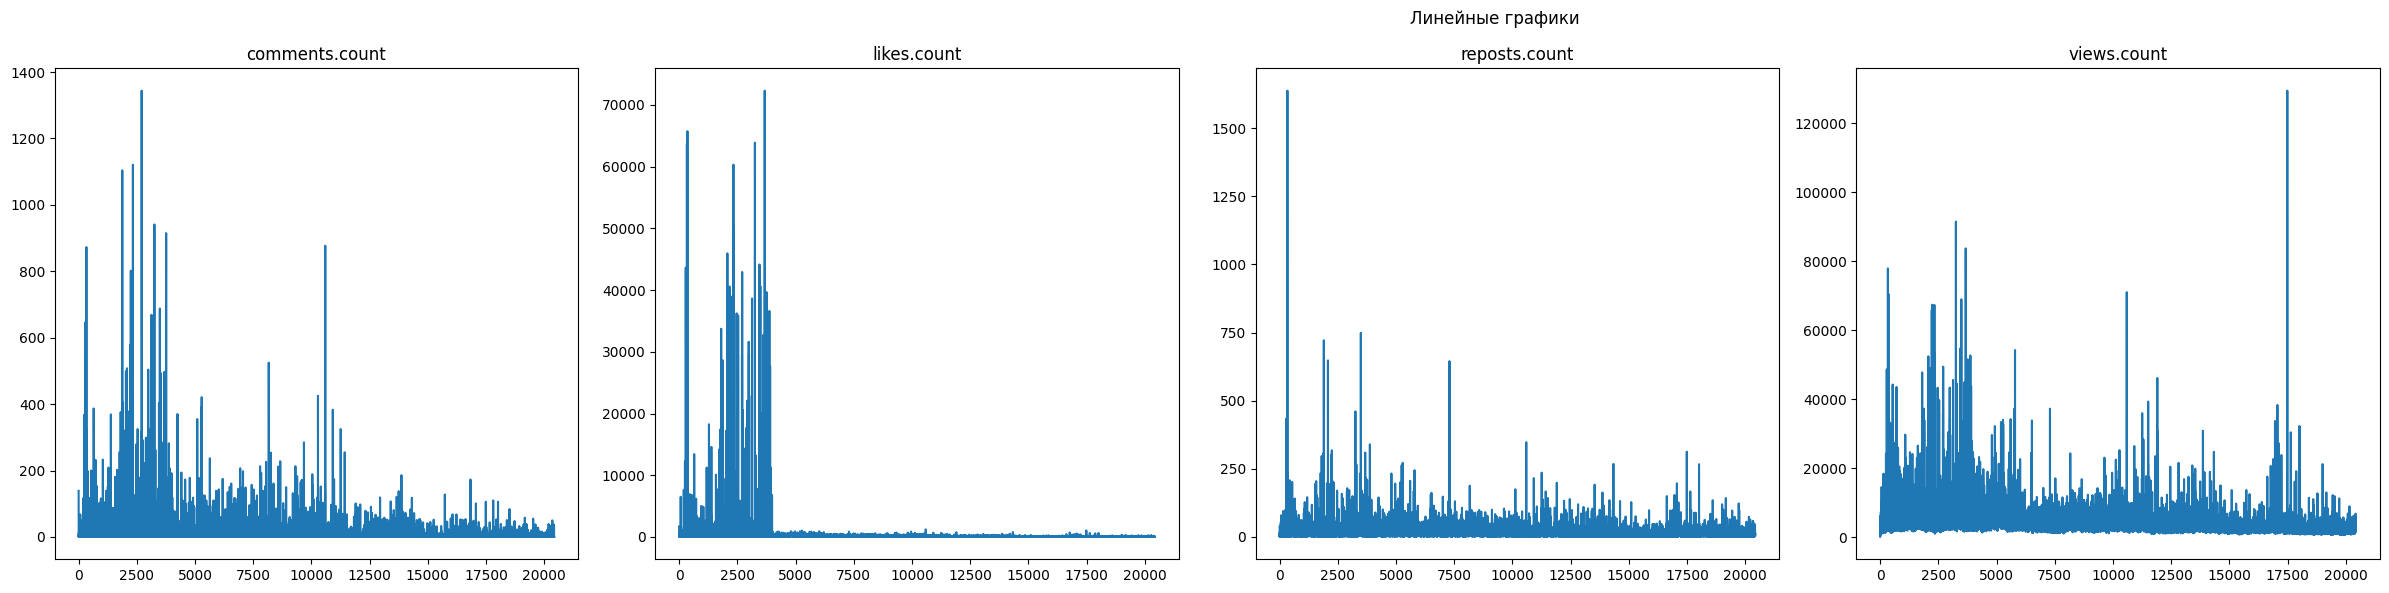

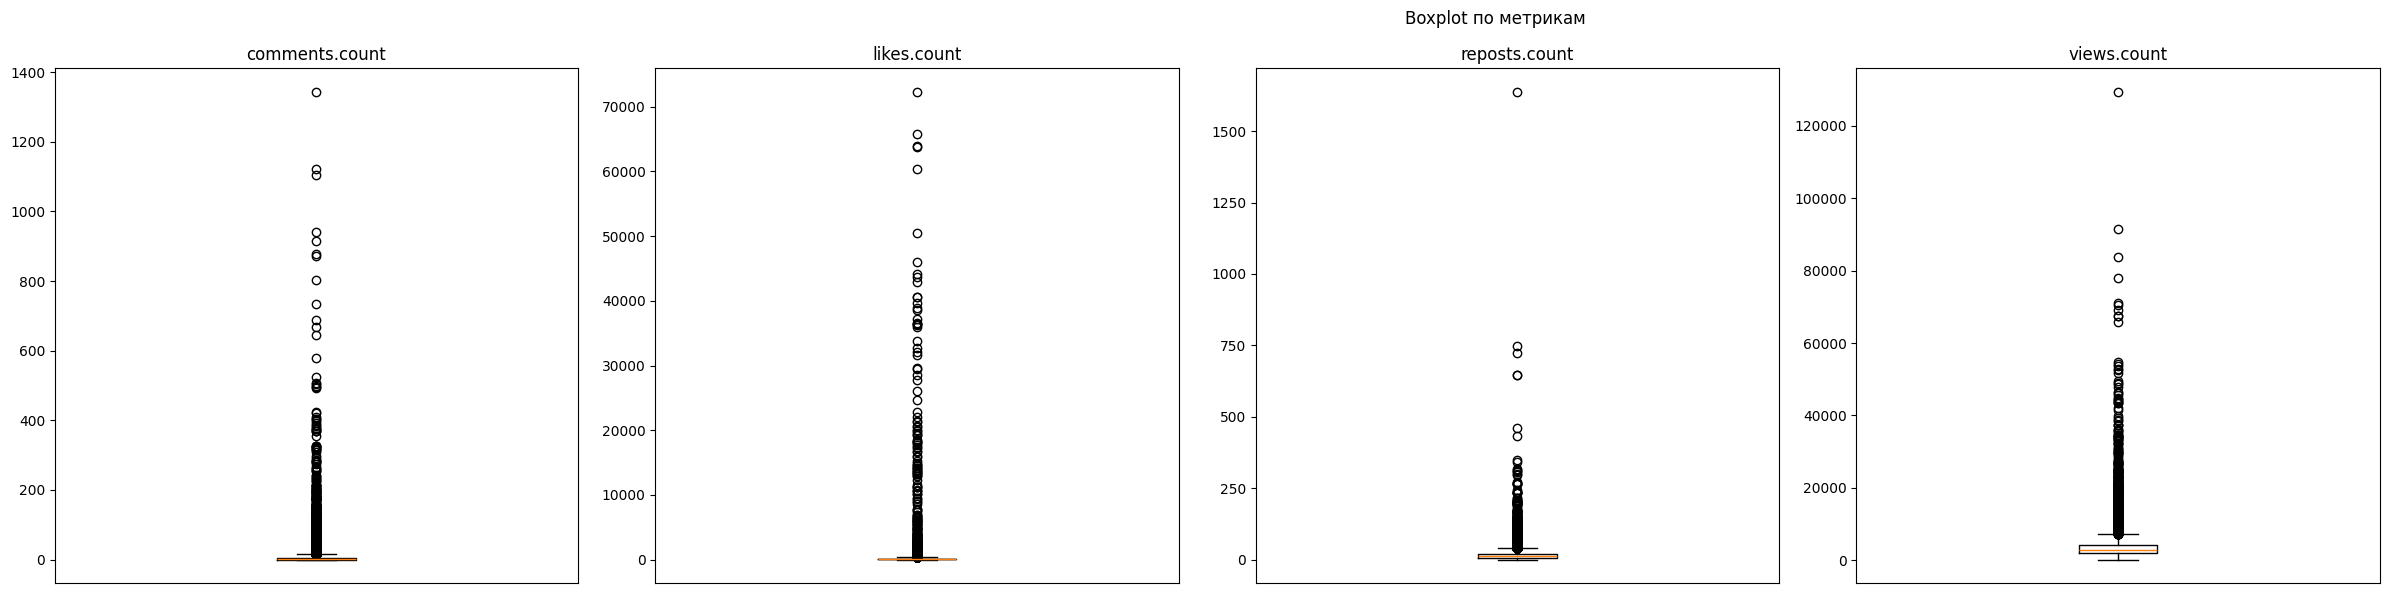

In [ ]:
selected_columns = df_filtered[columns]

# –°—Ç—Ä–æ–∏–º –ª–∏–Ω–µ–π–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    plt.plot(selected_columns[col].dropna())
    plt.title(col)
plt.suptitle('–õ–∏–Ω–µ–π–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏')
plt.tight_layout()
plt.show()

# –°—Ç—Ä–æ–∏–º boxplot (—è—â–∏–∫ —Å —É—Å–∞–º–∏) –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    plt.boxplot(selected_columns[col].dropna())
    plt.title(col)
    plt.xticks([])
plt.suptitle('Boxplot –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º')
plt.tight_layout()
plt.show()

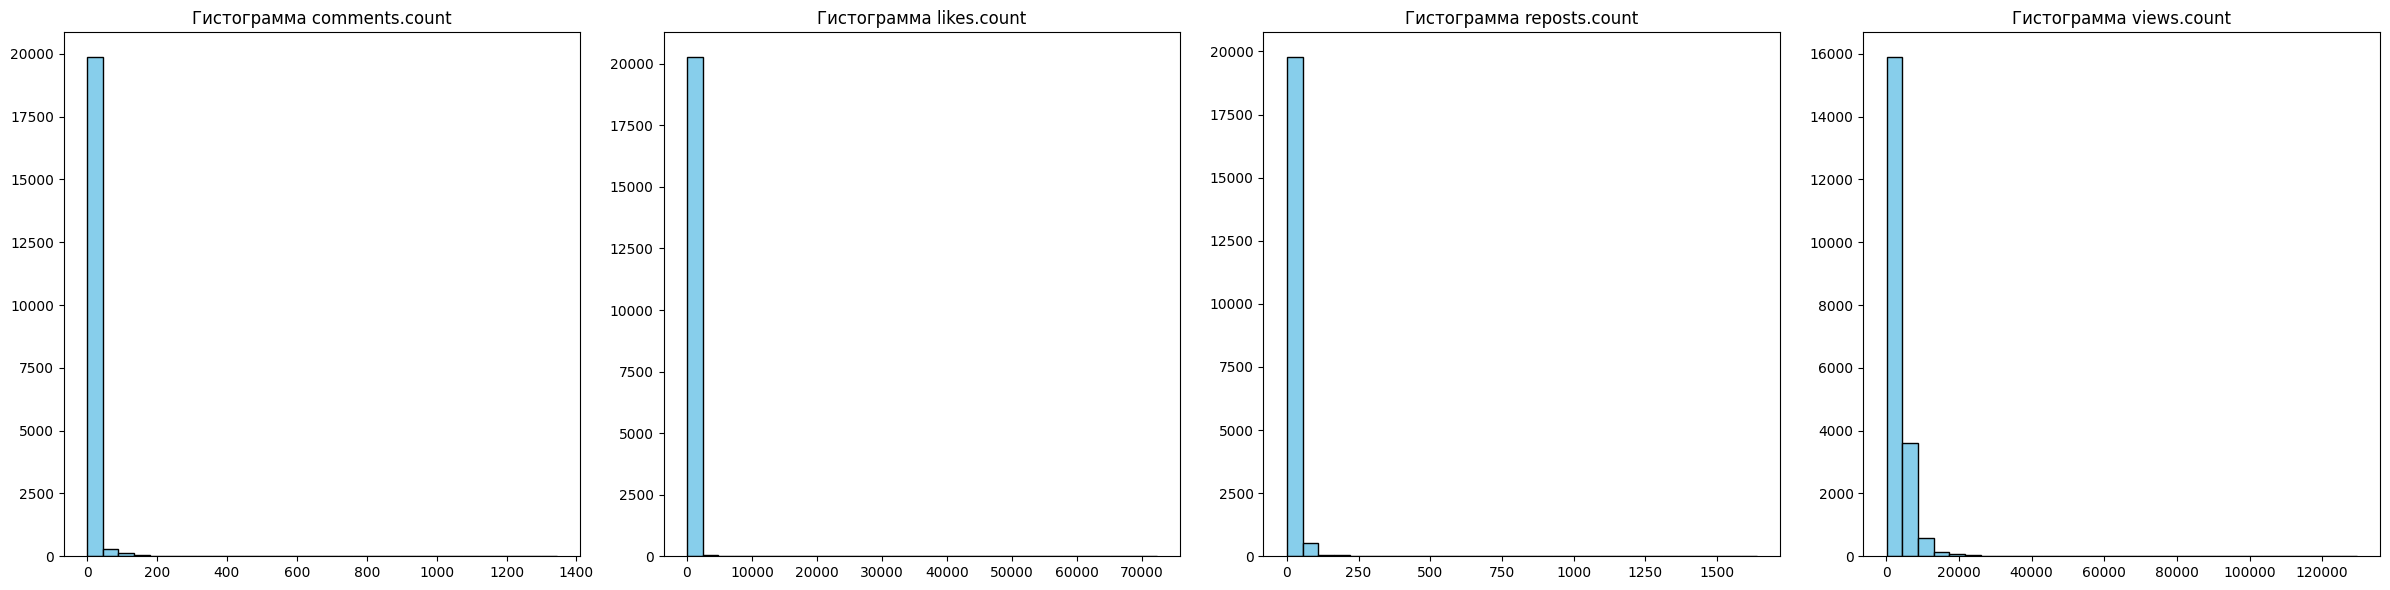

In [ ]:
# –ù–∞—Ä–∏—Å—É–µ–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    plt.hist(selected_columns[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {col}')
plt.tight_layout()
plt.show()

In [ ]:
# –ü–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã–µ –≤—Å–µ –∏–º–µ—é—Ç –≤—ã–±—Ä–æ—Å—ã, –±—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–º–µ–Ω–∏—Ç—å –∏—Ö –Ω–∞ –º–µ–¥–∏–∞–Ω—É
for col in columns:
    # –ù–∞—Ö–æ–¥–∏–º –ø–µ—Ä–≤—ã–π –∫–≤–∞—Ä—Ç–∏–ª—å (Q1) - –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ 25-–º –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–µ
    Q1 = selected_columns[col].quantile(0.25)
    # –ù–∞—Ö–æ–¥–∏–º —Ç—Ä–µ—Ç–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å (Q3) - –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ 75-–º –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–µ
    Q3 = selected_columns[col].quantile(0.75)
    # –í—ã—á–∏—Å–ª—è–µ–º –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö (IQR)
    IQR = Q3 - Q1

    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∏–∂–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ –∫–∞–∫ Q1 - 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≤–µ—Ä—Ö–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤ –∫–∞–∫ Q3 + 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # –ù–∞—Ö–æ–¥–∏–º –º–µ–¥–∏–∞–Ω—É —Å—Ç–æ–ª–±—Ü–∞ –¥–ª—è –∑–∞–º–µ–Ω—ã –≤—ã–±—Ä–æ—Å–æ–≤
    median_value = selected_columns[col].median()

    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é —Å—Ç–æ–ª–±—Ü–∞, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π SettingWithCopyWarning
    series = selected_columns[col].copy()

    # –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –∫–∞–∂–¥–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é —Å—Ç–æ–ª–±—Ü–∞:
    # –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–∏—Ç –∑–∞ –ø—Ä–µ–¥–µ–ª—ã [lower_bound, upper_bound], –∑–∞–º–µ–Ω—è–µ–º –µ–≥–æ –Ω–∞ –º–µ–¥–∏–∞–Ω—É,
    # –∏–Ω–∞—á–µ –æ—Å—Ç–∞–≤–ª—è–µ–º –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π
    selected_columns[col] = series.apply(
        lambda x: median_value if (x < lower_bound or x > upper_bound) else x
    )

/tmp/ipython-input-2227293452.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[col] = series.apply(
/tmp/ipython-input-2227293452.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[col] = series.apply(
/tmp/ipython-input-2227293452.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

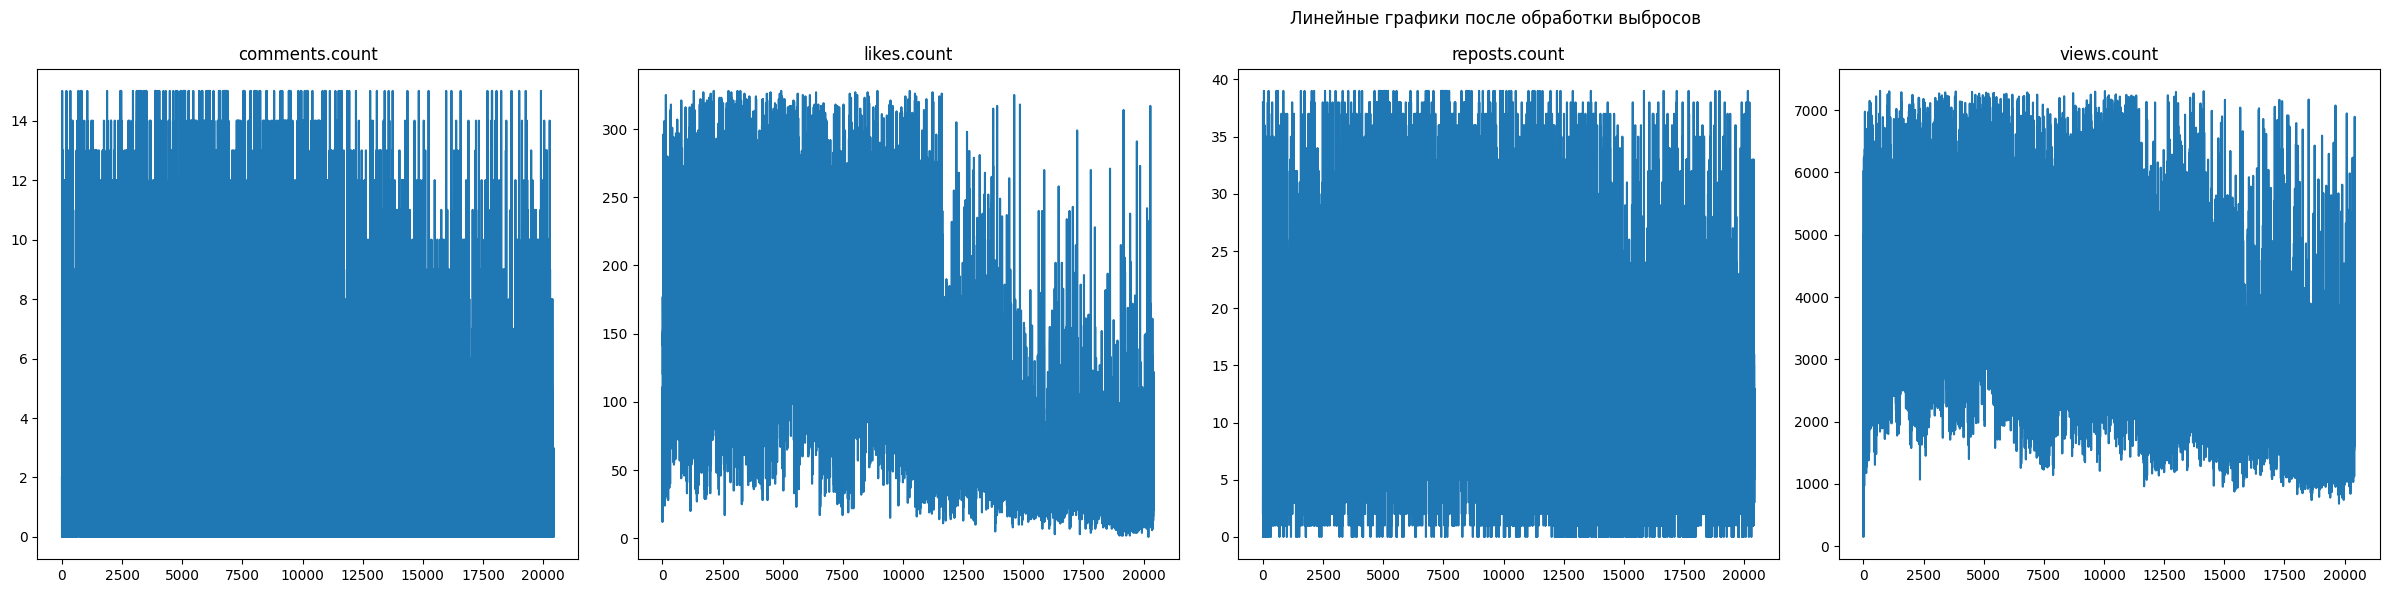

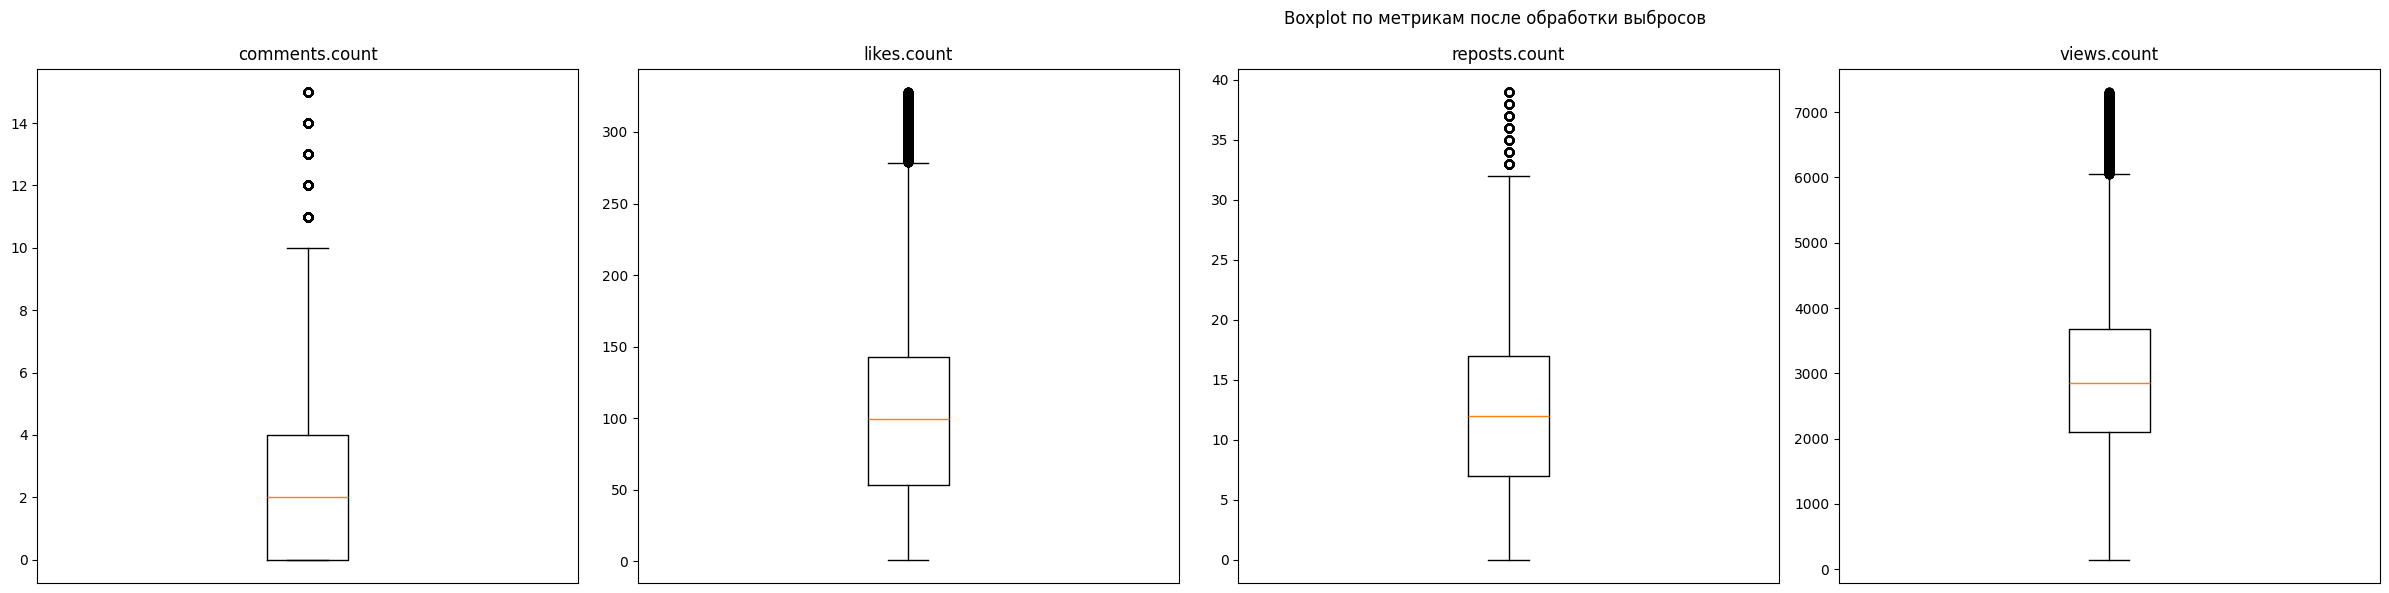

In [ ]:
# –õ–∏–Ω–µ–π–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –≤—ã–±—Ä–æ—Å–æ–≤
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    plt.plot(selected_columns[col].dropna())
    plt.title(col)
plt.suptitle('–õ–∏–Ω–µ–π–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏ –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—ã–±—Ä–æ—Å–æ–≤')
plt.tight_layout()
plt.show()

# Boxplot –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –≤—ã–±—Ä–æ—Å–æ–≤
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    plt.boxplot(selected_columns[col].dropna())
    plt.title(col)
    plt.xticks([])
plt.suptitle('Boxplot –ø–æ –º–µ—Ç—Ä–∏–∫–∞–º –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –≤—ã–±—Ä–æ—Å–æ–≤')
plt.tight_layout()
plt.show()

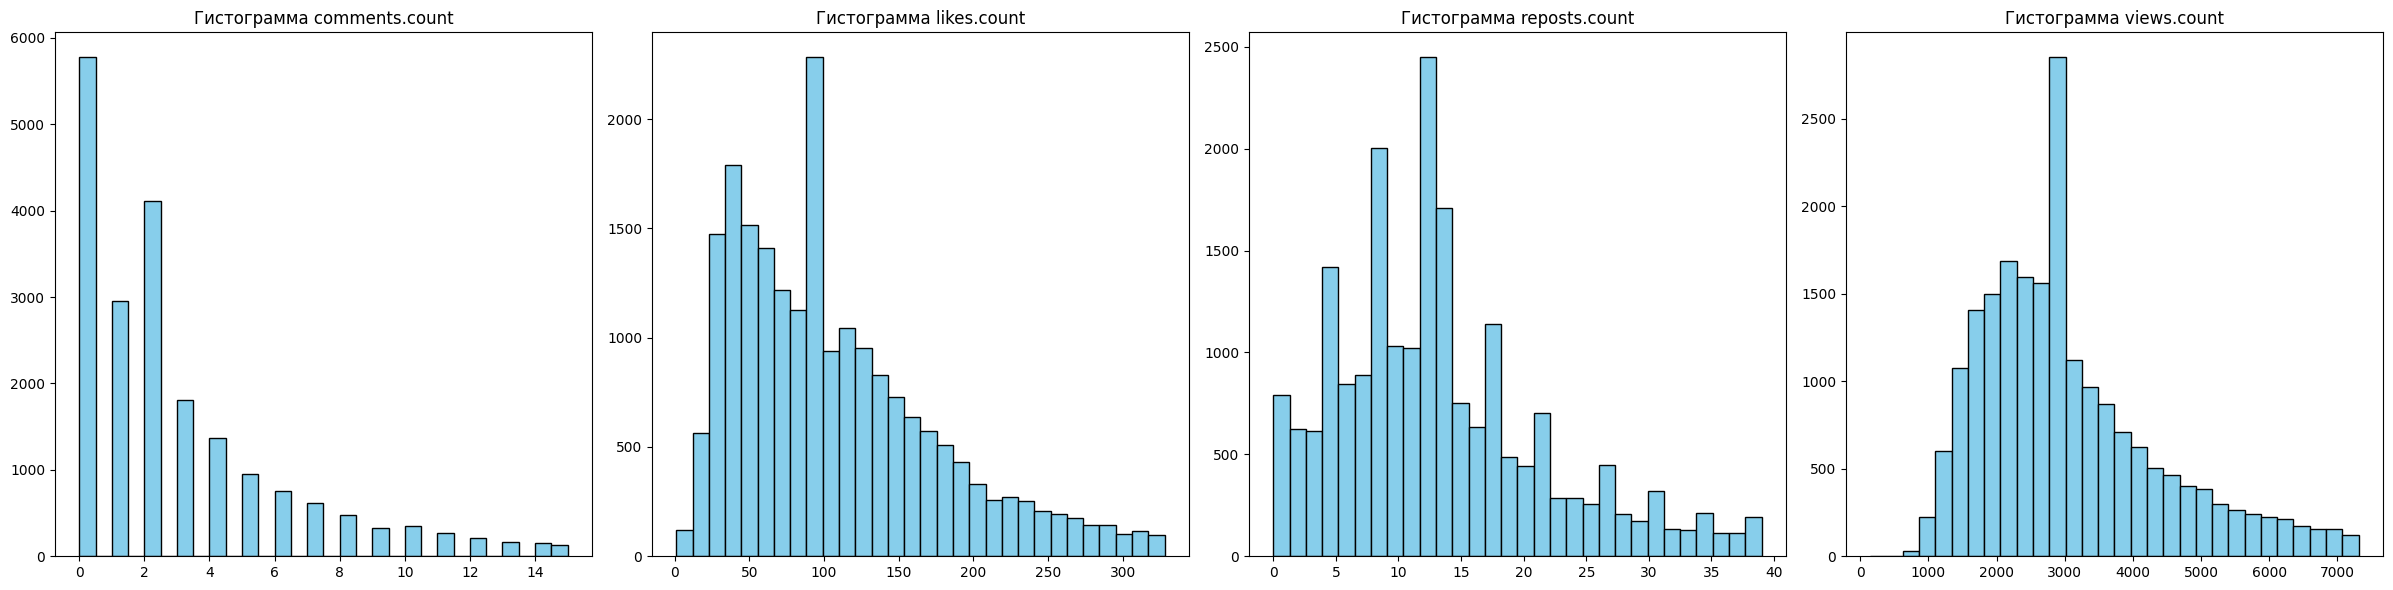

In [ ]:
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns):
    plt.subplot(1, 5, i + 1)
    plt.hist(selected_columns[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ {col}')
plt.tight_layout()
plt.show()

In [ ]:
for col in selected_columns.columns: # –∫–æ–ø–∏—Ä—É–µ–º –≤—ã–±—Ä–∞–Ω–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –∏–∑ selected_columns –æ–±—Ä–∞—Ç–Ω–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    df_filtered[col] = selected_columns[col]

/tmp/ipython-input-932309906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = selected_columns[col]


In [ ]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20426 2017-01-02 06:06:03  #–∏—â—É_–¥–æ–º@zzzperm \n–ú—ã—à–∫–∞ –∏—â–µ—Ç –¥–æ–º –±–µ–∑ –¥—Ä—É–≥–∏—Ö –ø...   
20427 2017-01-01 10:13:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ú–æ—Ä–∏—Å –∏—â–µ—Ç –¥–æ–º! \n–û–Ω –æ—á–µ–Ω—å ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   
20429 2017-01-01 06:13:00  #–∏—â—É_–¥–æ–º@zzzperm \n–®—É—Ä–∏–∫ ‚Äì –∫–æ–ª–æ—Ä–∏—Ç–Ω—ã–π –∫–æ—Ç–∏–∫ –≤ ...   

       comments.count  likes.count  reposts.count  views.count      id  
0                 2.0         99.0           38.0       6018.0  267316  
1                 0.0         12.0            2.0        147.0  267619  
2                 0.0         42.0            2.0        419.0  267612  
3                 0.0         75.0            9.0       1090.0  267606  
4                 0.0         74.0            7.0        857.0  267583  
...               ...          ...            ...          ...     ...  
20425             1.0         73.0            3.0       2812.0   50002  
20426             0.0         29.0            6.0       1733.0   50001  
20427             0.0         26.0            4.0       1838.0   49987  
20428             0.0         65.0            6.0       2270.0   49986  
20429             0.0         33.0           11.0       1961.0   49985  

[20430 rows x 7 columns]

In [ ]:
# –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã –ø–æ —Å—Ç–æ–ª–±—Ü—É 'text', –æ—Å—Ç–∞–≤–ª—è–µ–º –ø–µ—Ä–≤–æ–µ –≤—Ö–æ–∂–¥–µ–Ω–∏–µ
df_filtered = df_filtered.drop_duplicates(subset='text', keep='first')
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  
0                 2.0         99.0           38.0       6018.0  267316  
1                 0.0         12.0            2.0        147.0  267619  
2                 0.0         42.0            2.0        419.0  267612  
3                 0.0         75.0            9.0       1090.0  267606  
4                 0.0         74.0            7.0        857.0  267583  
...               ...          ...            ...          ...     ...  
20422             0.0         24.0            7.0       1985.0   50007  
20423             3.0         30.0            7.0       1896.0   50005  
20424             0.0         33.0           13.0       1926.0   50004  
20425             1.0         73.0            3.0       2812.0   50002  
20428             0.0         65.0            6.0       2270.0   49986  

[14064 rows x 7 columns]

In [ ]:
df_filtered = df_filtered.dropna(subset=['text']) # —É–¥–∞–ª—è–µ–º –ø–æ—Å—Ç—ã –±–µ–∑ —Ç–µ–∫—Å—Ç–∞, —Ç–∞–∫ –∫–∞–∫ –≤ —Ä–∞–º–∫–∞—Ö –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –æ–Ω–∏ –Ω–µ –Ω–µ—Å—É—Ç —Ü–µ–Ω–Ω–æ—Å—Ç—å
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  
0                 2.0         99.0           38.0       6018.0  267316  
1                 0.0         12.0            2.0        147.0  267619  
2                 0.0         42.0            2.0        419.0  267612  
3                 0.0         75.0            9.0       1090.0  267606  
4                 0.0         74.0            7.0        857.0  267583  
...               ...          ...            ...          ...     ...  
20422             0.0         24.0            7.0       1985.0   50007  
20423             3.0         30.0            7.0       1896.0   50005  
20424             0.0         33.0           13.0       1926.0   50004  
20425             1.0         73.0            3.0       2812.0   50002  
20428             0.0         65.0            6.0       2270.0   49986  

[14063 rows x 7 columns]

In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return '—É—Ç—Ä–æ'
    elif 12 <= hour < 18:
        return '–¥–µ–Ω—å'
    elif 18 <= hour < 23:
        return '–≤–µ—á–µ—Ä'
    else:
        return '–Ω–æ—á—å'

# –°–æ–∑–¥–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏
df_filtered['hour'] = df_filtered['date'].dt.hour
df_filtered['time_of_day'] = df_filtered['hour'].apply(get_time_of_day)
df_filtered['day_of_week'] = df_filtered['date'].dt.dayofweek  # 0=–ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 6=–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
df_filtered['month'] = df_filtered['date'].dt.month
df_filtered['is_weekend'] = df_filtered['day_of_week'].isin([5, 6])  # True, –µ—Å–ª–∏ –≤—ã—Ö–æ–¥–Ω–æ–π (—Å–±, –≤—Å)

# –§—É–Ω–∫—Ü–∏—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–µ–∑–æ–Ω–∞ –ø–æ –º–µ—Å—è—Ü—É (–¥–ª—è –†–æ—Å—Å–∏–∏/—Å—Ä–µ–¥–Ω–µ–π –ø–æ–ª–æ—Å—ã)
def get_season(month):
    if month in [12, 1, 2]:
        return '–∑–∏–º–∞'
    elif month in [3, 4, 5]:
        return '–≤–µ—Å–Ω–∞'
    elif month in [6, 7, 8]:
        return '–ª–µ—Ç–æ'
    else:
        return '–æ—Å–µ–Ω—å'

df_filtered['season'] = df_filtered['month'].apply(get_season)

/tmp/ipython-input-3532284041.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['date'].dt.hour
/tmp/ipython-input-3532284041.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_of_day'] = df_filtered['hour'].apply(get_time_of_day)
/tmp/ipython-input-3532284041.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

      time_of_day  day_of_week  month  is_weekend season  
0            –¥–µ–Ω—å            4      8       False   –ª–µ—Ç–æ  
1            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å  
2            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å  
3            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å  
4            –¥–µ–Ω—å            1      9       False  –æ—Å–µ–Ω—å  
...           ...          ...    ...         ...    ...  
20422        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞  
20423        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞  
20424        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞  
20425        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞  
20428        —É—Ç—Ä–æ            6      1        True   –∑–∏–º–∞  

[14063 rows x 13 columns]

–ü—Ä–∏—Å—Ç—É–ø–∞–µ–º –∫ —Ç–µ–∫—Å—Ç–æ–≤–æ–π –ø—Ä–µ–¥–æ–±–æ—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∑–∞—Ç–µ–º –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç –∞–Ω–∞–ª–∏–∑ –ø–æ—Å—Ç–æ–≤

In [ ]:
tqdm.pandas()
# –û—á–∏—â–∞–µ–º —Ç–µ–∫—Å—Ç –æ—Ç –ª–∏—à–Ω–∏—Ö —Å–∏–º–≤–æ–ª–æ–≤
def safe_clean(text):
    try:
        if not text or len(text.strip()) == 0:
            return ""
        cleaned_text = textPreprocessor.simbolsCleaner(text)
        # –ï—Å–ª–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç –ø—É—Å—Ç–æ–π, –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –ø—É—Å—Ç—É—é —Å—Ç—Ä–æ–∫—É
        if not cleaned_text or len(cleaned_text) == 0:
            return ""
        return cleaned_text
    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        return ""

df_filtered.loc[:, 'textPreprocessed'] = df_filtered['text'].progress_apply(safe_clean)

df_filtered

 32%|‚ñà‚ñà‚ñà‚ñè      | 4567/14063 [00:00<00:01, 6453.09it/s]

Error processing text: ‚ù§Ô∏è... - string index out of range
Error processing text: üôèüèª... - string index out of range
Error processing text: ‚ù§Ô∏è‚ù§Ô∏è... - string index out of range


 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 6017/14063 [00:00<00:01, 6840.50it/s]

Error processing text: ‚ù§... - string index out of range


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 9600/14063 [00:01<00:00, 6615.82it/s]

Error processing text: ü§™... - string index out of range
Error processing text: üòÑ... - string index out of range
Error processing text: üôè... - string index out of range
Error processing text: üíö... - string index out of range
Error processing text: üê±‚ù§Ô∏è... - string index out of range
Error processing text: ‚ú®... - string index out of range


 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 12829/14063 [00:01<00:00, 7033.11it/s]

Error processing text: üòÖ... - string index out of range
Error processing text: üòπ... - string index out of range
Error processing text: üòä... - string index out of range


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14063/14063 [00:02<00:00, 6832.12it/s]
/tmp/ipython-input-343689462.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'textPreprocessed'] = df_filtered['text'].progress_apply(safe_clean)


Error processing text: üòé... - string index out of range


date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

      time_of_day  day_of_week  month  is_weekend season  \
0            –¥–µ–Ω—å            4      8       False   –ª–µ—Ç–æ   
1            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
2            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
3            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
4            –¥–µ–Ω—å            1      9       False  –æ—Å–µ–Ω—å   
...           ...          ...    ...         ...    ...   
20422        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20423        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20424        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20425        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20428        —É—Ç—Ä–æ            6      1        True   –∑–∏–º–∞   

                                        textPreprocessed  
0      –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫ –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ–≥...  
1      –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å club232253162 –ö–û–¢–û–ü–ÅC —É...  
2      –∏—â—É –¥–æ–º matroskinperm –ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ –∏—â–µ—Ç –¥...  
3      –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è–µ...  
4      –∏—â—É –¥–æ–º matroskinperm –õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏—â–µ—Ç –¥–æ...  
...                                                  ...  
20422  –î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π –Ω–æ –¥–µ–ª–∞—é...  
20423  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...  
20424  –∏—â—É –¥–æ–º zzzperm –ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ...  
20425  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ —á—Ç–æ –∫–æ—Ç—ã —ç—Ç–æ –∂–∏–¥...  

In [ ]:
# –õ–µ–º–º–∞—Ç–∏–∑–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç –ø–æ —á–∞—Å—Ç—è–º

chunk_size = 500
results = []

for start in tqdm(range(0, len(df_filtered), chunk_size)):
    chunk = df_filtered.iloc[start:start+chunk_size]
    processed_chunk = textPreprocessor.pymystemLemmatizer(chunk, 'textPreprocessed')
    results.append(processed_chunk)

df_filtered['textPreprocessed'] = pd.concat(results)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [02:55<00:00,  6.04s/it]
/tmp/ipython-input-2235934942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['textPreprocessed'] = pd.concat(results)


In [ ]:
# –û—á–∏—â–∞–µ–º —Ç–µ–∫—Å—Ç—ã –æ—Ç —Å—Ç–æ–ø —Å–ª–æ–≤
df_filtered['textPreprocessed'] = df_filtered['textPreprocessed'].progress_apply(lambda text: textPreprocessor.stopwordsDropper(text))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14063/14063 [00:07<00:00, 1935.59it/s]
/tmp/ipython-input-2018548546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['textPreprocessed'] = df_filtered['textPreprocessed'].progress_apply(lambda text: textPreprocessor.stopwordsDropper(text))


In [ ]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

      time_of_day  day_of_week  month  is_weekend season  \
0            –¥–µ–Ω—å            4      8       False   –ª–µ—Ç–æ   
1            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
2            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
3            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
4            –¥–µ–Ω—å            1      9       False  –æ—Å–µ–Ω—å   
...           ...          ...    ...         ...    ...   
20422        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20423        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20424        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20425        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20428        —É—Ç—Ä–æ            6      1        True   –∑–∏–º–∞   

                                        textPreprocessed  
0      —Å–≤–µ—Ç–ª—è—á–æ–∫ –∑–≤–∞—Ç—å —á–∞–ø–µ–∫ –º–∏–Ω—É—Ç–∞ –º–æ–∑–≥ –ø—Ä–µ–≤—Ä–∞—â–∞—Ç—å—Å—è...  
1      —Å–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å club232253162 –∫–æ—Ç–æ–ø–µ—Å 7...  
2      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–∏–µ—Å—Ç–∞ –∏—Å–∫...  
3      –æ–∫–∞–∑—ã–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –ø–æ–º–æ—â—å –∫–æ—à–∫–∞ —è–≤–ª—è—Ç—å—Å—è...  
4      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ª—é–±–æ–ø—ã—Ç–Ω—ã–π —Ñ–µ—Å—Ç –∏—Å–∫–∞—Ç...  
...                                                  ...  
20422  –¥–µ–ª—å—Ñ–∏–Ω –ª—é–±–∏—Ç—å —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª—å –¥–µ–ª–∞—Ç—å –µ–¥–∞ –æ...  
20423  —é–Ω—ã–π –∞–¥–æ–ª—å—Ñ –Ω–∞–¥–µ—è—Ç—å—Å—è –≤—Å—Ç—Ä–µ—á–∞ —Å–∞–º—ã–π —Ö–æ—Ä–æ—à–∏–π —Ö–æ...  
20424  –∏—Å–∫–∞—Ç—å –¥–æ–º zzzperm —á–µ—Ä–Ω—ã—à –∂–¥–∞—Ç—å –¥–æ–±—Ä—ã–π —á–µ–ª–æ–≤–µ—á...  
20425              –æ—á–µ—Ä–µ–¥–Ω–æ–π –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ –∫–æ—Ç –∂–∏–¥–∫–æ—Å—Ç—å  

–ü—Ä–æ–≤–µ–¥–µ–º —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç –∞–Ω–∞–ª–∏–∑

In [ ]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å –¥–ª—è —Ç–æ–Ω–∞–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Ä—É—Å—Å–∫–æ–≥–æ —Ç–µ–∫—Å—Ç–∞
sentiment_model = pipeline("text-classification", model="blanchefort/rubert-base-cased-sentiment")

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º Mystem
mstem = pymystem3.Mystem()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –ø—Ä–∏–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã—Ö –∏–∑ —Ç–µ–∫—Å—Ç–∞
def extract_adjectives(text):
    analysis = mstem.analyze(text)
    lexemes = []
    for token in analysis:
        if token.get('analysis'):
            gr = token['analysis'][0].get('gr', '')
            # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –ø—Ä–∏–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã–µ (–æ–±–æ–∑–Ω–∞—á–∞—é—Ç—Å—è –±—É–∫–≤–æ–π 'A')
            if gr.startswith('A'):
                lex = token['analysis'][0].get('lex', '')
                if lex:
                    lexemes.append(lex)
    return ' '.join(lexemes)

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∏–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø—Ä–∏–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã—Ö –∫ –∫–∞–∂–¥–æ–º—É —Ç–µ–∫—Å—Ç—É —Å –ø—Ä–æ–≥—Ä–µ—Å—Å–æ–º
tqdm.pandas()
df_filtered['adjectives'] = df_filtered['textPreprocessed'].astype(str).progress_apply(extract_adjectives)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14063/14063 [00:35<00:00, 397.91it/s]
/tmp/ipython-input-1310114721.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['adjectives'] = df_filtered['textPreprocessed'].astype(str).progress_apply(extract_adjectives)


In [ ]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ —Ç–µ–∫—Å—Ç–∞ —Å –æ–±—Ä–µ–∑–∫–æ–π –¥–æ 512 —Å–∏–º–≤–æ–ª–æ–≤
def get_sentiment_score(text):
    if not text.strip():
        return 'neutral'  # –ï—Å–ª–∏ —Ç–µ–∫—Å—Ç –ø—É—Å—Ç–æ–π, —Å—á–∏—Ç–∞–µ–º –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–º
    try:
        result = sentiment_model(text[:512], truncation=True, max_length=512)[0]
        label = result['label']
        if label.lower() == 'positive':
            return 'positive'
        elif label.lower() == 'neutral':
            return 'neutral'
        elif label.lower() == 'negative':
            return 'negative'
        else:
            return label.lower()
    except Exception:
        return 'not_defined'

# –ü—Ä–∏–º–µ–Ω—è–µ–º –∞–Ω–∞–ª–∏–∑ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∫ –∏–∑–≤–ª–µ—á–µ–Ω–Ω—ã–º –ø—Ä–∏–ª–∞–≥–∞—Ç–µ–ª—å–Ω—ã–º —Å –ø—Ä–æ–≥—Ä–µ—Å—Å–æ–º
df_filtered['sentiment_score'] = df_filtered['adjectives'].progress_apply(get_sentiment_score)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14063/14063 [02:01<00:00, 115.44it/s]
/tmp/ipython-input-690552674.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_score'] = df_filtered['adjectives'].progress_apply(get_sentiment_score)


In [ ]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

      time_of_day  day_of_week  month  is_weekend season  \
0            –¥–µ–Ω—å            4      8       False   –ª–µ—Ç–æ   
1            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
2            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
3            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
4            –¥–µ–Ω—å            1      9       False  –æ—Å–µ–Ω—å   
...           ...          ...    ...         ...    ...   
20422        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20423        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20424        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20425        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20428        —É—Ç—Ä–æ            6      1        True   –∑–∏–º–∞   

                                        textPreprocessed  \
0      —Å–≤–µ—Ç–ª—è—á–æ–∫ –∑–≤–∞—Ç—å —á–∞–ø–µ–∫ –º–∏–Ω—É—Ç–∞ –º–æ–∑–≥ –ø—Ä–µ–≤—Ä–∞—â–∞—Ç—å—Å—è...   
1      —Å–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å club232253162 –∫–æ—Ç–æ–ø–µ—Å 7...   
2      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–∏–µ—Å—Ç–∞ –∏—Å–∫...   
3      –æ–∫–∞–∑—ã–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –ø–æ–º–æ—â—å –∫–æ—à–∫–∞ —è–≤–ª—è—Ç—å—Å—è...   
4      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ª—é–±–æ–ø—ã—Ç–Ω—ã–π —Ñ–µ—Å—Ç –∏—Å–∫–∞—Ç...   
...                                                  ...   
20422  –¥–µ–ª—å—Ñ–∏–Ω –ª—é–±–∏—Ç—å —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª—å –¥–µ–ª–∞—Ç—å –µ–¥–∞ –æ...   
20423  —é–Ω—ã–π –∞–¥–æ–ª—å—Ñ –Ω–∞–¥–µ—è—Ç—å—Å—è –≤—Å—Ç—Ä–µ—á–∞ —Å–∞–º—ã–π —Ö–æ—Ä–æ—à–∏–π —Ö–æ...   
20424  –∏—Å–∫–∞—Ç—å –¥–æ–º zzzperm —á–µ—Ä–Ω—ã—à –∂–¥–∞—Ç—å –¥–æ–±—Ä—ã–π —á–µ–ª–æ–≤–µ—á...   
20425              –æ—á–µ—Ä–µ–¥–Ω–æ–π –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ –∫–æ—Ç –∂–∏–¥–∫

–ü—Ä–∏—Å—Ç—É–ø–∞–µ–º –∫ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ—Å—Ç–æ–≤

In [33]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å SBERT –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–µ–∫—Å—Ç—ã –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏
texts = df_filtered['text'].astype(str).tolist()
embeddings = model.encode(texts, show_progress_bar=True, batch_size=32)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/440 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:23<00:00,  1.21it/s]


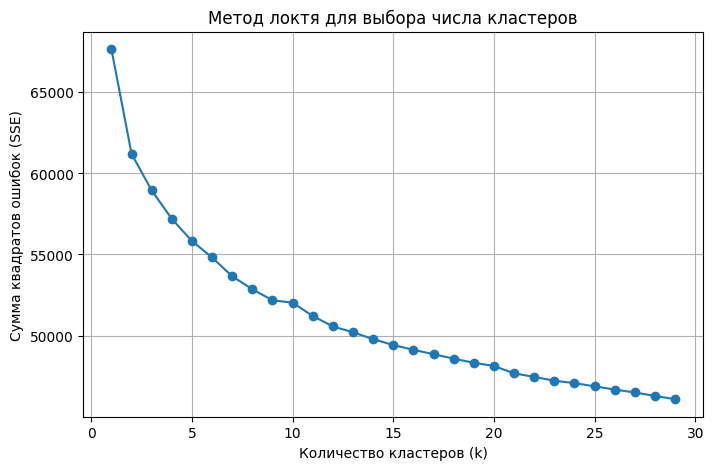

In [34]:
sse = []  # –°—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—à–∏–±–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
k_range = range(1, 30)  # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –æ—Ç 1 –¥–æ 15

for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    sse.append(kmeans.inertia_)  # inertia_ ‚Äî —Å—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –¥–æ —Ü–µ–Ω—Ç—Ä–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ –º–µ—Ç–æ–¥–∞ –ª–æ–∫—Ç—è
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)')
plt.ylabel('–°—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—à–∏–±–æ–∫ (SSE)')
plt.title('–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è –¥–ª—è –≤—ã–±–æ—Ä–∞ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
plt.grid(True)
plt.show()

In [ ]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º K-means –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=11)
clusters = kmeans.fit_predict(embeddings)

# –î–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Ç–æ–ø–∏–∫–æ–≤) –≤ DataFrame
df_filtered['topic_cluster'] = clusters

# –î–ª—è –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏–∑ —Ç–æ–ø 10 —Ç–µ–∫—Å—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_texts = df_filtered[df_filtered['topic_cluster'] == cluster_num]['text'].tolist()
    # –ó–¥–µ—Å—å –º–æ–∂–Ω–æ –≤—ã–≤–µ—Å—Ç–∏ –ø—Ä–∏–º–µ—Ä–Ω—ã–µ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏–ª–∏ —Ç–æ–ø —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–µ–º–∞—Ç–∏–∫–∏
    for text in cluster_texts[:10]:
        print(f" - {text}...")
    print()

In [36]:
score = silhouette_score(embeddings, clusters)
print(f"–°–∏–ª—É—ç—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: {score:.4f}")

–°–∏–ª—É—ç—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: 0.0360


In [37]:
# –°–ª–æ–≤–∞—Ä—å —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
cluster_names = {
    0: "–ü–æ–º–æ—â—å –ø—Ä–∏—é—Ç–∞–º –∏ –±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å",
    1: "–ü–æ–∏—Å–∫ –¥–æ–º–∞ –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –∫–æ—Ç–∏–∫–æ–≤",
    2: "–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ –∞–∫—Ü–∏–∏ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –∂–∏–≤–æ—Ç–Ω—ã—Ö",
    3: "–ò—Å—Ç–æ—Ä–∏–∏ —Å–ø–∞—Å–µ–Ω–∏—è –∏ –ø—Ä–æ—Å—å–±—ã –æ –ø–æ–º–æ—â–∏",
    4: "–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø–æ–∏—Å–∫ –Ω–æ–≤—ã—Ö —Ö–æ–∑—è–µ–≤",
    5: "–°–æ—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–æ–µ–∫—Ç—ã –∏ –ø—Ä–æ—Å–≤–µ—Ç–∏—Ç–µ–ª—å—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞",
    6: "–≠–∫—Å—Ç—Ä–µ–Ω–Ω–∞—è –ø–æ–º–æ—â—å –∏ —Å–ø–∞—Å–µ–Ω–∏–µ –∂–∏–≤–æ—Ç–Ω—ã—Ö",
    7: "–¢–µ–ø–ª—ã–µ –∏—Å—Ç–æ—Ä–∏–∏ –∏ –∑–∞–±–æ—Ç–∞ –æ –∂–∏–≤–æ—Ç–Ω—ã—Ö",
    8: "–û—Å–æ–±–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–∏ –∏ –∏—Å—Ç–æ—Ä–∏–∏ –±–æ–ª–µ–∑–Ω–∏",
    9: "–ü—Ä–æ—â–∞–Ω–∏—è, –ø–∞–º—è—Ç—å –∏ –∏—Å—Ç–æ—Ä–∏–∏"
}

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
df_filtered['cluster_name'] = df_filtered['topic_cluster'].map(cluster_names)


/tmp/ipython-input-3292349855.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster_name'] = df_filtered['topic_cluster'].map(cluster_names)


In [38]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

      time_of_day  day_of_week  month  is_weekend season  \
0            –¥–µ–Ω—å            4      8       False   –ª–µ—Ç–æ   
1            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
2            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
3            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
4            –¥–µ–Ω—å            1      9       False  –æ—Å–µ–Ω—å   
...           ...          ...    ...         ...    ...   
20422        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20423        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20424        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20425        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20428        —É—Ç—Ä–æ            6      1        True   –∑–∏–º–∞   

                                        textPreprocessed  \
0      —Å–≤–µ—Ç–ª—è—á–æ–∫ –∑–≤–∞—Ç—å —á–∞–ø–µ–∫ –º–∏–Ω—É—Ç–∞ –º–æ–∑–≥ –ø—Ä–µ–≤—Ä–∞—â–∞—Ç—å—Å—è...   
1      —Å–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å club232253162 –∫–æ—Ç–æ–ø–µ—Å 7...   
2      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–∏–µ—Å—Ç–∞ –∏—Å–∫...   
3      –æ–∫–∞–∑—ã–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –ø–æ–º–æ—â—å –∫–æ—à–∫–∞ —è–≤–ª—è—Ç—å—Å—è...   
4      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ª—é–±–æ–ø—ã—Ç–Ω—ã–π —Ñ–µ—Å—Ç –∏—Å–∫–∞—Ç...   
...                                                  ...   
20422  –¥–µ–ª—å—Ñ–∏–Ω –ª—é–±–∏—Ç—å —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª—å –¥–µ–ª–∞—Ç—å –µ–¥–∞ –æ...   
20423  —é–Ω—ã–π –∞–¥–æ–ª—å—Ñ –Ω–∞–¥–µ—è—Ç—å—Å—è –≤—Å—Ç—Ä–µ—á–∞ —Å–∞–º—ã–π —Ö–æ—Ä–æ—à–∏–π —Ö–æ...   
20424  –∏—Å–∫–∞—Ç—å –¥–æ–º zzzperm —á–µ—Ä–Ω—ã—à –∂–¥–∞—Ç—å –¥–æ–±—Ä—ã–π —á–µ–ª–æ–≤–µ—á...   
20425              –æ—á–µ—Ä–µ–¥–Ω–æ–π –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ –∫–æ—Ç –∂–∏–¥–∫

In [39]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ —Å–ª–æ–≤ –≤ —Å—Ç—Ä–æ–∫–µ
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0

# –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å–ª–æ–≤
df_filtered['word_count'] = df_filtered['text'].apply(count_words)

/tmp/ipython-input-549150466.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['word_count'] = df_filtered['text'].apply(count_words)


In [40]:
df_filtered

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

      time_of_day  day_of_week  month  is_weekend season  \
0            –¥–µ–Ω—å            4      8       False   –ª–µ—Ç–æ   
1            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
2            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
3            —É—Ç—Ä–æ            2      9       False  –æ—Å–µ–Ω—å   
4            –¥–µ–Ω—å            1      9       False  –æ—Å–µ–Ω—å   
...           ...          ...    ...         ...    ...   
20422        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20423        –¥–µ–Ω—å            0      1       False   –∑–∏–º–∞   
20424        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20425        —É—Ç—Ä–æ            0      1       False   –∑–∏–º–∞   
20428        —É—Ç—Ä–æ            6      1        True   –∑–∏–º–∞   

                                        textPreprocessed  \
0      —Å–≤–µ—Ç–ª—è—á–æ–∫ –∑–≤–∞—Ç—å —á–∞–ø–µ–∫ –º–∏–Ω—É—Ç–∞ –º–æ–∑–≥ –ø—Ä–µ–≤—Ä–∞—â–∞—Ç—å—Å—è...   
1      —Å–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å club232253162 –∫–æ—Ç–æ–ø–µ—Å 7...   
2      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π —Å–∏–µ—Å—Ç–∞ –∏—Å–∫...   
3      –æ–∫–∞–∑—ã–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –ø–æ–º–æ—â—å –∫–æ—à–∫–∞ —è–≤–ª—è—Ç—å—Å—è...   
4      –∏—Å–∫–∞—Ç—å –¥–æ–º matroskinperm –ª—é–±–æ–ø—ã—Ç–Ω—ã–π —Ñ–µ—Å—Ç –∏—Å–∫–∞—Ç...   
...                                                  ...   
20422  –¥–µ–ª—å—Ñ–∏–Ω –ª—é–±–∏—Ç—å —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª—å –¥–µ–ª–∞—Ç—å –µ–¥–∞ –æ...   
20423  —é–Ω—ã–π –∞–¥–æ–ª—å—Ñ –Ω–∞–¥–µ—è—Ç—å—Å—è –≤—Å—Ç—Ä–µ—á–∞ —Å–∞–º—ã–π —Ö–æ—Ä–æ—à–∏–π —Ö–æ...   
20424  –∏—Å–∫–∞—Ç—å –¥–æ–º zzzperm —á–µ—Ä–Ω—ã—à –∂–¥–∞—Ç—å –¥–æ–±—Ä—ã–π —á–µ–ª–æ–≤–µ—á...   
20425              –æ—á–µ—Ä–µ–¥–Ω–æ–π –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ –∫–æ—Ç –∂–∏–¥–∫

In [41]:
df_filtered.columns

Index(['date', 'text', 'comments.count', 'likes.count', 'reposts.count',
       'views.count', 'id', 'hour', 'time_of_day', 'day_of_week', 'month',
       'is_weekend', 'season', 'textPreprocessed', 'adjectives',
       'sentiment_score', 'topic_cluster', 'cluster_name', 'word_count'],
      dtype='object')

In [42]:
# –í—ã–±–∏—Ä–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è
categorical_cols = ['time_of_day', 'season', 'sentiment_score', 'cluster_name']

# –í—ã–ø–æ–ª–Ω—è–µ–º one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ —Å drop_first=True, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –¥–∞–º–º–∏-–ª–æ–≤—É—à–∫–∏
df_encoded = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)

In [43]:
df_encoded

date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

       day_of_week  month  ...  sentiment_score_positive  \
0                4      8  ...                     False   
1                2      9  ...                      True   
2                2      9  ...                      True   
3                2      9  ...                     False   
4                1      9  ...                     False   
...            ...    ...  ...                       ...   
20422            0      1  ...                      True   
20423            0      1  ...                      True   
20424            0      1  ...                      True   
20425            0      1  ...                     False   
20428            6      1  ...                     False   

      cluster_name_–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ –∞–∫—Ü–∏–∏ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –∂–∏–≤–æ—Ç–Ω—ã—Ö  \
0                                                  False      
1                                                   True      
2                                                  False      
3                                                  False      
4                                                  False      
...                                                  ...      
20422                                              False      
20423                                              False      
20424                                              False      
20425                                              False      
20428                                              False      

      cluster_name_–û—Å–æ–±–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–∏ –∏ –∏—Å—Ç–æ—Ä–∏–∏ –±–æ–ª–µ–∑–Ω–∏  \
0                                                True   
1                                               False   
2                                               Fals

In [44]:
df_encoded.columns

Index(['date', 'text', 'comments.count', 'likes.count', 'reposts.count',
       'views.count', 'id', 'hour', 'day_of_week', 'month', 'is_weekend',
       'textPreprocessed', 'adjectives', 'topic_cluster', 'word_count',
       'time_of_day_–¥–µ–Ω—å', 'time_of_day_–Ω–æ—á—å', 'time_of_day_—É—Ç—Ä–æ',
       'season_–∑–∏–º–∞', 'season_–ª–µ—Ç–æ', 'season_–æ—Å–µ–Ω—å', 'sentiment_score_neutral',
       'sentiment_score_positive',
       'cluster_name_–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ –∞–∫—Ü–∏–∏ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –∂–∏–≤–æ—Ç–Ω—ã—Ö',
       'cluster_name_–û—Å–æ–±–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–∏ –∏ –∏—Å—Ç–æ—Ä–∏–∏ –±–æ–ª–µ–∑–Ω–∏',
       'cluster_name_–ü–æ–∏—Å–∫ –¥–æ–º–∞ –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –∫–æ—Ç–∏–∫–æ–≤',
       'cluster_name_–ü–æ–º–æ—â—å –ø—Ä–∏—é—Ç–∞–º –∏ –±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',
       'cluster_name_–ü—Ä–æ—â–∞–Ω–∏—è, –ø–∞–º—è—Ç—å –∏ –∏—Å—Ç–æ—Ä–∏–∏',
       'cluster_name_–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø–æ–∏—Å–∫ –Ω–æ–≤—ã—Ö —Ö–æ–∑—è–µ–≤',
       'cluster_name_–°–æ—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–æ–µ

In [45]:
df_encoded.replace({True: 1, False: 0}, inplace=True)
df_encoded

/tmp/ipython-input-2189424462.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({True: 1, False: 0}, inplace=True)


date                                               text  \
0     2025-08-29 13:11:54  –≠—Ç–æ–≥–æ —Å–≤–µ—Ç–ª—è—á–∫–∞ –∑–æ–≤—É—Ç –ß–∞–ø–µ–∫. –ò –∫–∞–∂–¥—É—é –º–∏–Ω—É—Ç—É –µ...   
1     2025-09-03 10:01:06  –°–∞–º—ã–π –¥–æ–±—Ä—ã–π —Ñ–µ—Å—Ç–∏–≤–∞–ª—å [club232253162|–ö–û–¢–û–ü–ÅC]...   
2     2025-09-03 08:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–ü—Ä–µ–∫—Ä–∞—Å–Ω–∞—è –°–∏–µ—Å—Ç–∞ ...   
3     2025-09-03 06:00:00  –û–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—É—é –ø–æ–º–æ—â—å. –ö–æ—à–∫–∞ –Ω–µ —è–≤–ª—è...   
4     2025-09-02 12:00:00  #–∏—â—É_–¥–æ–º@matroskinperm \n \n–õ—é–±–æ–ø—ã—Ç–Ω–∞—è –§–µ—Å—Ç–∞ –∏...   
...                   ...                                                ...   
20422 2017-01-02 15:05:12  ¬´–î–µ–ª—å—Ñ–∏–Ω—ã –Ω–µ –ª—é–±—è—Ç —Ä–∞–∑–≤–ª–µ–∫–∞—Ç—å –∑—Ä–∏—Ç–µ–ª–µ–π, –Ω–æ –¥–µ–ª...   
20423 2017-01-02 13:09:02  –Æ–Ω—ã–π –ê–¥–æ–ª—å—Ñ –Ω–∞–¥–µ–µ—Ç—Å—è –Ω–∞ –≤—Å—Ç—Ä–µ—á—É —Å —Å–∞–º—ã–º –ª—É—á—à–∏–º...   
20424 2017-01-02 10:07:00  #–∏—â—É_–¥–æ–º@zzzperm \n–ß–µ—Ä–Ω—ã—à –∂–¥–µ—Ç –¥–æ–±—Ä–æ–µ —á–µ–ª–æ–≤–µ—á–µ...   
20425 2017-01-02 08:12:01  –û—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–∫–∞–∑–∞—Ç–µ–ª—å—Å—Ç–≤–æ —Ç–æ–≥–æ, —á—Ç–æ –∫–æ—Ç—ã ‚Äî —ç—Ç–æ ...   
20428 2017-01-01 08:05:16  –ú—ã –±–µ–∑ –∫–∞–ø–µ–ª—å–∫–∏ —Å–º—É—â–µ–Ω–∏—è \n–®–ª–µ–º –∫–æ—à–∞—á—å–∏ –ø–æ–∑–¥—Ä–∞...   

       comments.count  likes.count  reposts.count  views.count      id  hour  \
0                 2.0         99.0           38.0       6018.0  267316    13   
1                 0.0         12.0            2.0        147.0  267619    10   
2                 0.0         42.0            2.0        419.0  267612     8   
3                 0.0         75.0            9.0       1090.0  267606     6   
4                 0.0         74.0            7.0        857.0  267583    12   
...               ...          ...            ...          ...     ...   ...   
20422             0.0         24.0            7.0       1985.0   50007    15   
20423             3.0         30.0            7.0       1896.0   50005    13   
20424             0.0         33.0           13.0       1926.0   50004    10   
20425             1.0         73.0            3.0       2812.0   50002     8   
20428             0.0         65.0            6.0       2270.0   49986     8   

       day_of_week  month  ...  sentiment_score_positive  \
0                4      8  ...                         0   
1                2      9  ...                         1   
2                2      9  ...                         1   
3                2      9  ...                         0   
4                1      9  ...                         0   
...            ...    ...  ...                       ...   
20422            0      1  ...                         1   
20423            0      1  ...                         1   
20424            0      1  ...                         1   
20425            0      1  ...                         0   
20428            6      1  ...                         0   

      cluster_name_–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ –∞–∫—Ü–∏–∏ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –∂–∏–≤–æ—Ç–Ω—ã—Ö  \
0                                                      0      
1                                                      1      
2                                                      0      
3                                                      0      
4                                                      0      
...                                                  ...      
20422                                                  0      
20423                                                  0      
20424                                                  0      
20425                                                  0      
20428                                                  0      

      cluster_name_–û—Å–æ–±–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–∏ –∏ –∏—Å—Ç–æ—Ä–∏–∏ –±–æ–ª–µ–∑–Ω–∏  \
0                                                   1   
1                                                   0   
2                                                   

In [46]:
df_encoded.columns

Index(['date', 'text', 'comments.count', 'likes.count', 'reposts.count',
       'views.count', 'id', 'hour', 'day_of_week', 'month', 'is_weekend',
       'textPreprocessed', 'adjectives', 'topic_cluster', 'word_count',
       'time_of_day_–¥–µ–Ω—å', 'time_of_day_–Ω–æ—á—å', 'time_of_day_—É—Ç—Ä–æ',
       'season_–∑–∏–º–∞', 'season_–ª–µ—Ç–æ', 'season_–æ—Å–µ–Ω—å', 'sentiment_score_neutral',
       'sentiment_score_positive',
       'cluster_name_–ú–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è –∏ –∞–∫—Ü–∏–∏ –≤ –ø–æ–¥–¥–µ—Ä–∂–∫—É –∂–∏–≤–æ—Ç–Ω—ã—Ö',
       'cluster_name_–û—Å–æ–±–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–∏ –∏ –∏—Å—Ç–æ—Ä–∏–∏ –±–æ–ª–µ–∑–Ω–∏',
       'cluster_name_–ü–æ–∏—Å–∫ –¥–æ–º–∞ –¥–ª—è –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –∫–æ—Ç–∏–∫–æ–≤',
       'cluster_name_–ü–æ–º–æ—â—å –ø—Ä–∏—é—Ç–∞–º –∏ –±–ª–∞–≥–æ—Ç–≤–æ—Ä–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å',
       'cluster_name_–ü—Ä–æ—â–∞–Ω–∏—è, –ø–∞–º—è—Ç—å –∏ –∏—Å—Ç–æ—Ä–∏–∏',
       'cluster_name_–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –ø–æ–∏—Å–∫ –Ω–æ–≤—ã—Ö —Ö–æ–∑—è–µ–≤',
       'cluster_name_–°–æ—Ü–∏–∞–ª—å–Ω—ã–µ –ø—Ä–æ–µ

In [49]:
df_encoded.to_csv('prepared_data.csv')